In this file, the goal is to plot the reconstruction error and the umap projection of the latent space includings the dataset PEPR_Marseille

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read all the necessary files

In [2]:

error_ukb = pd.read_csv("/neurospin/tmp/fred/models/2025-11-10/SC-sylv_right_UKB_16-20-03_123/Chamfer_distance.csv")
error_hcp = pd.read_csv("/neurospin/tmp/fred/models/2025-11-10/SC-sylv_right_UKB_16-20-03_123/hcp/Chamfer_distance.csv")
error_PBS= pd.read_csv("/neurospin/tmp/fred/models/2025-11-10/SC-sylv_right_UKB_16-20-03_123/epilepsy_PBS/Chamfer_distance.csv")
error_PEPR= pd.read_csv("/neurospin/tmp/fred/models/2025-11-10/SC-sylv_right_UKB_16-20-03_123/PEPR_Marseille/Chamfer_distance.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/neurospin/tmp/fred/models/2025-11-10/SC-sylv_right_UKB_16-20-03_123/Chamfer_distance.csv'

In [ ]:
selected_index = np.load("/neurospin/dico/fred/Runs/01_betaVAE/Program/2023_jlaval_STSbabies/betaVAE/notebooks/fred/PEPR_Marseille/All the subjects/histogram_non_zero/index_to_save.npy")

In [ ]:
len(selected_index)

825

In [ ]:
error_PEPR= error_PEPR.loc[selected_index]

In [ ]:
len(error_PEPR)

825

In [ ]:
error_ukb

,Unnamed: 0,0
0,1000021,2726.425293
1,1000325,2984.175293
2,1000458,3312.738281
3,1000575,2973.837402
4,1000606,3103.183594
...,...,...
42428,6023847,2857.341064
42429,6024038,3087.666016
42430,6024150,2652.197021
42431,6024379,2993.993652


In [ ]:
error_hcp

,Unnamed: 0,0
0,100206,4361.577148
1,100307,2790.406006
2,100408,2865.013672
3,100610,2966.909180
4,101006,2957.589844
...,...,...
1109,992774,3208.058350
1110,993675,2998.156738
1111,994273,3036.695557
1112,995174,2718.952637


In [ ]:
Participants_epilepsy=pd.read_csv("/neurospin/dico/data/human/epilepsy_PBS/participants.tsv", sep="\t")

In [ ]:
epilepsy_controls= Participants_epilepsy[Participants_epilepsy["Diagnosis"]=="controls"]

In [ ]:
#We rename the first colomn 

error_PBS= error_PBS.rename(columns={error_PBS.columns[0]: "Index"})


In [ ]:
error_controls =error_PBS.merge(epilepsy_controls[["Index"]], on="Index", how="inner")


Histogramme des erreurs de reconstruction (cross entropy loss)

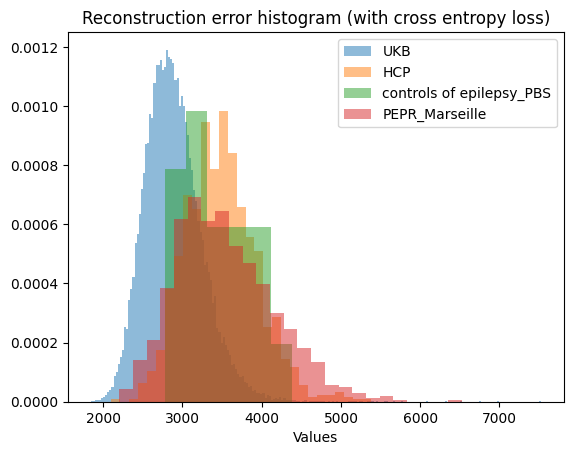

In [ ]:
plt.hist(error_ukb.iloc[:,1], bins="auto", alpha=0.5, label="UKB", density=True)
plt.hist(error_hcp.iloc[:,1], bins="auto", alpha=0.5, label="HCP", density=True)
plt.hist(error_controls.iloc[:,1], bins="auto", alpha=0.5, label="controls of epilepsy_PBS", density=True)
plt.hist(error_PEPR.iloc[:,1], bins="auto", alpha=0.5, label="PEPR_Marseille",density=True)

plt.xlabel("Values")

plt.title("Reconstruction error histogram (with Chamfer distance)")
plt.legend()
plt.show()